In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np
import h5py


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


In [2]:
filename = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\Source Data\matrix1.mat")


In [3]:
filename

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 23 18:57:43 2024',
 '__version__': '1.0',
 '__globals__': [],
 'ha': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.54338926],
        [0.        , 0.        , 0.        , ..., 0.        , 2.93825781,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])}

In [4]:
train__ = torch.tensor(filename['ha'])
m, k1, k2 = train__.shape[0], 10, 2
net = Neural_NMF([m, k1, k2])
history = train(net, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:27<00:00,  2.79s/it]


In [5]:
A = history[0][0]
B = history[1][1]
C = history[0][1].detach().numpy()
A1 = A.detach().numpy()
B1 = B.detach().numpy()

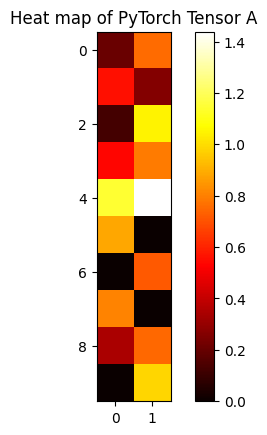

In [6]:
plt.imshow(C[:100,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat map of PyTorch Tensor A')
plt.show()

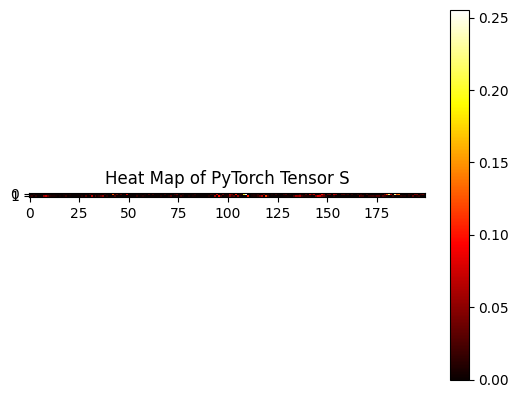

In [7]:
plt.imshow(B1[:,300:500], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [8]:
A1.shape

(79, 10)

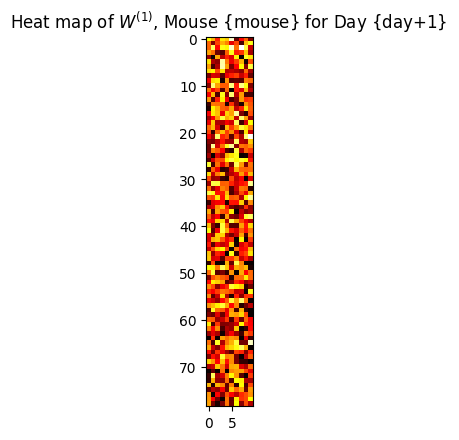

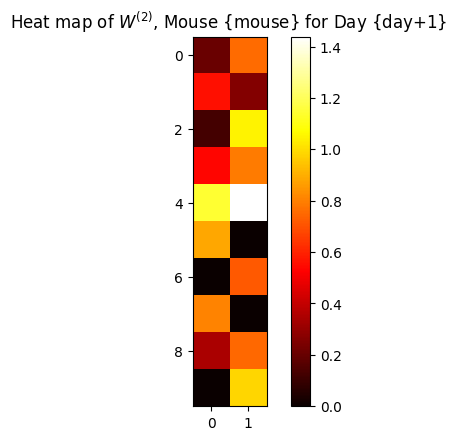

In [9]:
plt.imshow(A1[:,:], cmap='hot', interpolation='nearest')
plt.title(r'Heat map of $W^{(1)}$, ' 'Mouse {mouse} for Day {day+1} ')
plt.show()

plt.imshow(C[:,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(r'Heat map of $W^{(2)}$, ' 'Mouse {mouse} for Day {day+1} ')
plt.show()

In [10]:
S = history[1][1]

In [11]:
A2 = history[0][1]
A2.shape

torch.Size([10, 2])

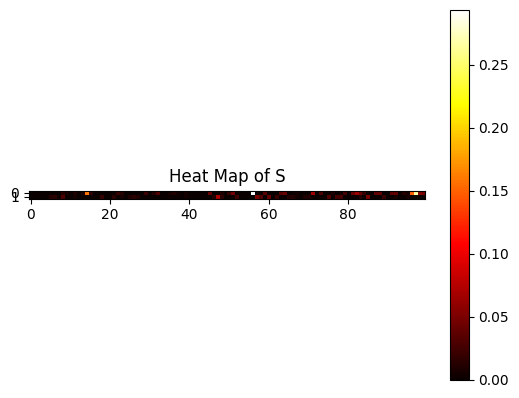

In [12]:
plt.imshow(S.detach().numpy()[:,0:100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(f'Heat Map of S')
plt.show()


In [13]:
sums = torch.sum(A2@S,dim = 0)
sums.shape

torch.Size([5959])

In [14]:
sed = sums.detach().numpy().reshape(1,-1)
sed.shape

(1, 5959)

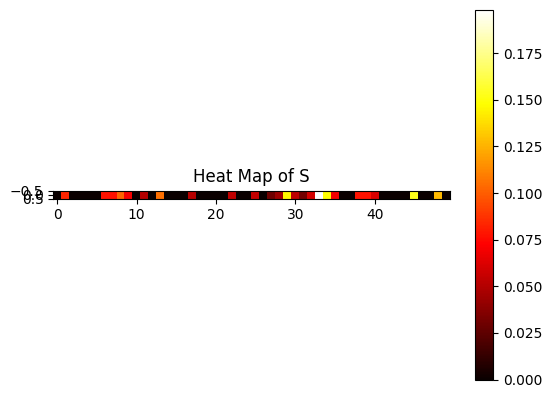

In [15]:
plt.imshow(sed[:,150:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title(f'Heat Map of S')
plt.show()


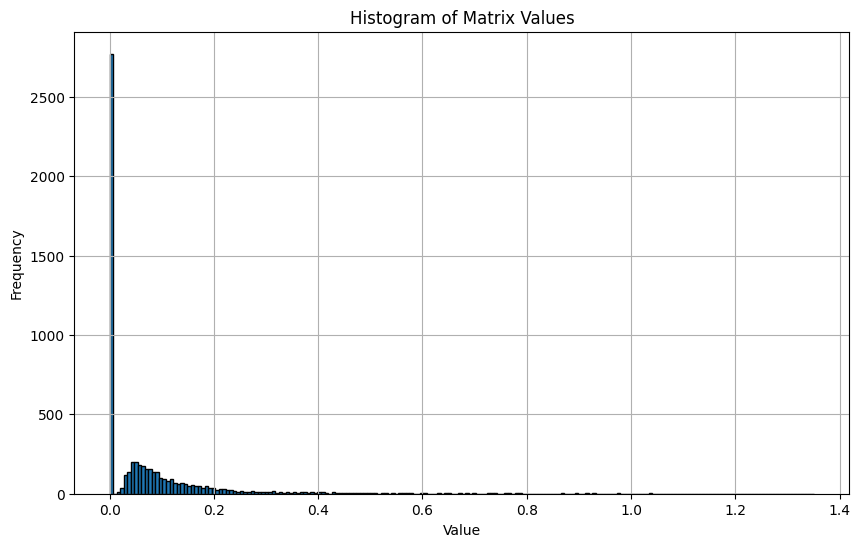

In [16]:
matrix_flat = sed.flatten()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(matrix_flat, bins=200, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.grid(True)

# Display the plot
plt.show()

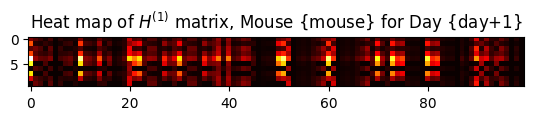

In [17]:
columns_above_threshold = torch.nonzero(torch.tensor(sed) > 0.8, as_tuple=True)[1]
S2 = (A2@S).detach().numpy()
S2[S2 < 0] = 0
slices = []
for idx in columns_above_threshold:
    if idx + 20 <= S2.shape[1]:
        slices.append(S2[:, idx:idx+10])
    else:
        slices.append(S2[:, idx:])
C = np.hstack(slices) if slices else np.array([])

plt.imshow(C[:,0:100], cmap='hot', interpolation='nearest')
plt.title(r'Heat map of $H^{(1)}$ ' 'matrix, Mouse {mouse} for Day {day+1}')
plt.show()

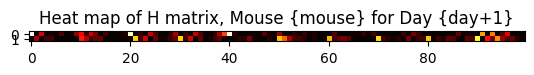

In [18]:
S1 = S.detach().numpy()
S1[S1 < 0] = 0
slices = []
for idx in columns_above_threshold:
    if idx + 20 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+10])
    else:
        slices.append(S1[:, idx:])
C = np.hstack(slices) if slices else np.array([])

plt.imshow(C[:,100:200], cmap='hot', interpolation='nearest')
plt.title('Heat map of H matrix, Mouse {mouse} for Day {day+1}')
plt.show()

In [19]:
columns_above_threshold

tensor([  56,   97,  108,  110,  118,  408,  409,  481,  484,  889, 1189, 1784,
        2379, 2380, 3579, 4168, 4466, 4830, 4841, 5058, 5125, 5194, 5198, 5209,
        5210, 5222, 5356, 5810, 5902, 5955, 5956, 5958])